# Assignment 1 (Student ID: 21005371)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Pandas options
pd.set_option('max_columns', 20)
pd.set_option('max_rows',10)

In [4]:
# This line enables the plots to be embedded into the notebook
%matplotlib inline

## Question 1: NZ Health survey data

### Importing data

In [5]:
# Import data
original_df = pd.read_csv("../datasets/health_survey.csv", encoding = "latin")
original_df.head()

,Unnamed: 0,population,short.description,group,percent.16,percent.15,percent.14,percent.13,percent.12,percent.11,percent.06,percent.07,p.value.16.15,p.value.16.14,p.value.16.13,p.value.16.12,p.value.16.11,p.value.16.06,p.value.16.07
0,1,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN,0.0054,0.7635,0.3533,0.4386,0.0068,0.1178,NaN
1,2,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN,0.0649,0.2558,0.3232,0.1348,0.0247,0.0971,NaN
2,3,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN,0.0165,0.5380,0.5282,0.9708,0.0131,0.3323,NaN
3,4,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN,0.1554,0.5678,0.9125,0.2326,0.0074,0.0048,NaN
4,5,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN,0.1104,0.3706,0.4546,0.7370,0.3865,0.7472,NaN


In [6]:
hs_df = original_df.copy()
hs_df.head()

,Unnamed: 0,population,short.description,group,percent.16,percent.15,percent.14,percent.13,percent.12,percent.11,percent.06,percent.07,p.value.16.15,p.value.16.14,p.value.16.13,p.value.16.12,p.value.16.11,p.value.16.06,p.value.16.07
0,1,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN,0.0054,0.7635,0.3533,0.4386,0.0068,0.1178,NaN
1,2,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN,0.0649,0.2558,0.3232,0.1348,0.0247,0.0971,NaN
2,3,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN,0.0165,0.5380,0.5282,0.9708,0.0131,0.3323,NaN
3,4,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN,0.1554,0.5678,0.9125,0.2326,0.0074,0.0048,NaN
4,5,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN,0.1104,0.3706,0.4546,0.7370,0.3865,0.7472,NaN


In [7]:
# Remove the first unnamed column and the seven ‘p.value’ columns
hs_df = hs_df.drop(['Unnamed: 0', 'p.value.16.15', 'p.value.16.14', 'p.value.16.13', 'p.value.16.12', 'p.value.16.11', 'p.value.16.06', 'p.value.16.07'], axis=1)
hs_df.head()

,population,short.description,group,percent.16,percent.15,percent.14,percent.13,percent.12,percent.11,percent.06,percent.07
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
1,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN
2,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN
3,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN
4,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN


In [8]:
# Change all ‘percent’ column name to their associated ‘year’ values (e.g. the name for ‘percent.16’ changes to ‘2016’)
# health_survey_df = health_survey_df.rename(index=str, columns=lambda x: '20'+ x[8:] if x.startswith('percent.') else x)
hs_df.columns =[column.replace("percent.", "20") for column in hs_df.columns]
hs_df.head()

,population,short.description,group,2016,2015,2014,2013,2012,2011,2006,2007
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
1,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN
2,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN
3,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN
4,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN


In [9]:
# Change column name of ‘short.description’ to ‘description’
hs_df.rename(columns={'short.description': 'description'}, inplace=True)
hs_df.head()

,population,description,group,2016,2015,2014,2013,2012,2011,2006,2007
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
1,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN
2,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN
3,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN
4,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN


### Filtering

In [10]:
# Display the unique labels in the ‘description’ column
unique_desc = hs_df.description.unique()
unique_desc

array(['Physically active', 'After-hours medical centre visit',
       'Past-year drinkers', 'Amphetamine use (total population)',
       'Amphetamine use (16-64 years)', 'Anxiety disorder', 'Arthritis',
       'Asthma (medicated)', 'Bipolar disorder', 'Mean BMI (kg/m²)',
       'Cannabis use', 'Definite confidence and trust in GP',
       'Current smokers', 'Daily smokers',
       'Only visit dental health care worker for problems',
       'Dental health care worker visit', 'Depression', 'Diabetes',
       'Type 2 diabetes (proxy)', 'Mean diastolic blood pressure (mmHg)',
       'Heavy episodic drinking at least monthly (total population)',
       'Heavy episodic drinking at least monthly (past-year drinkers)',
       'Heavy episodic drinking at least weekly (total population)',
       'Heavy episodic drinking at least weekly (past-year drinkers)',
       'All teeth removed due to decay', 'ED visit', 'Ex-smokers',
       'GP good at explaining health conditions and treatments',
      

In [11]:
# Save a new health_survey_df with following criteria: match six of the 'description' of your choice,
#                                        match the 'Total' label in the group column,
#                                        match the 'adult' label in the population column
new_hs_df = hs_df.query('population == "adults" and group == "Total" and (description == "Bipolar disorder" or \
                   description == "Anxiety disorder" or description == "Heavy smokers" or description == "Obese class 3" or \
                   description == "Heart failure" or description == "Unmet need for GP due to cost")')
new_hs_df

,population,description,group,2016,2015,2014,2013,2012,2011,2006,2007
112,adults,Anxiety disorder,Total,10.3,9.5,7.8,8.4,6.4,6.1,4.3,NaN
178,adults,Bipolar disorder,Total,1.1,0.9,0.8,1.0,0.9,0.8,0.7,NaN
909,adults,Heart failure,Total,2.1,1.9,1.9,2.0,2.1,2.0,2.1,NaN
931,adults,Heavy smokers,Total,7.7,7.4,8.2,8.5,9.3,9.6,10.7,NaN
1403,adults,Obese class 3,Total,5.5,5.1,5.3,4.5,4.4,3.8,3.4,NaN
1835,adults,Unmet need for GP due to cost,Total,14.3,14.3,13.7,14.0,14.5,13.6,NaN,NaN


### Wrangling and reshaping

In [12]:
# Reshape the dataframe according to given instruction
shaped_hs_df = new_hs_df.set_index('description').T
shaped_hs_df.drop(['population', 'group'], axis=0, inplace=True)
shaped_hs_df.rename_axis('Year', inplace=True)
shaped_hs_df.sort_values(by=['Year'], inplace=True)
shaped_hs_df

description,Anxiety disorder,Bipolar disorder,Heart failure,Heavy smokers,Obese class 3,Unmet need for GP due to cost
Year,,,,,,
2006,4.3,0.7,2.1,10.7,3.4,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN
2011,6.1,0.8,2,9.6,3.8,13.6
2012,6.4,0.9,2.1,9.3,4.4,14.5
2013,8.4,1,2,8.5,4.5,14
2014,7.8,0.8,1.9,8.2,5.3,13.7
2015,9.5,0.9,1.9,7.4,5.1,14.3
2016,10.3,1.1,2.1,7.7,5.5,14.3


### Creating a function

Function that will perform the wrangling from new_hs_df and shaped_hs_df for any combination of population, group
and any number of description labels

In [13]:
def wrangle(population, group, description):
    new_hs_df = hs_df[(hs_df.population == population) & (hs_df.group == group) & (hs_df.description.isin(description))]  
    shaped_hs_df = new_hs_df.set_index('description').T
    shaped_hs_df.drop(['population', 'group'], axis=0, inplace=True)
    shaped_hs_df.rename_axis('Year', inplace=True)
    shaped_hs_df.sort_values(by=['Year'], inplace=True)
    return shaped_hs_df
# Test 1
wrangle('adults', 'Total',["Bipolar disorder", "Anxiety disorder", "Depression"])

description,Anxiety disorder,Bipolar disorder,Depression
Year,,,
2006,4.3,0.7,10.4
2007,NaN,NaN,NaN
2011,6.1,0.8,14.3
2012,6.4,0.9,14.5
2013,8.4,1,15.5
2014,7.8,0.8,14.6
2015,9.5,0.9,15.4
2016,10.3,1.1,16.7


In [14]:
# Test 2
wrangle('children', 'Total', ["Fruit intake", "Little or no physical activity", "Emotional and/or behavioural problems", "Television watching"])

description,Emotional and/or behavioural problems,Fruit intake,Television watching
Year,,,
2006,1.8,NaN,NaN
2007,NaN,NaN,NaN
2011,3.3,71.6,53
2012,4.4,73.3,52.3
2013,4,73.1,49.3
2014,4,74.8,44.8
2015,4.3,73.6,44.8
2016,4.9,72.4,38.1


In [15]:
# Test 3
wrangle('adults', 'Women', ['Excellent, very good or good self-rated health', 'Current smokers'])

description,Current smokers,"Excellent, very good or good self-rated health"
Year,,
2006,18.9,89.7
2007,NaN,NaN
2011,17.5,88.9
2012,16.7,89.7
2013,15.8,91.5
2014,15,88.7
2015,14.6,87.5
2016,14.1,88.3


### Plotting:

Two plots by using dataframes created

In [16]:
# Import some extra plotting libraries that pretty-fy the plots 
import seaborn as sns
from pylab import rcParams

rcParams['figure.dpi'] =120
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'grey'
rcParams['font.family'] = 'Arial'

In [17]:
# Create data frame that will be used for plotting
hs_df_to_plot = new_hs_df.drop(['population', 'group'], axis=1)
hs_df_to_plot = hs_df_to_plot.set_index('description')
hs_df_to_plot.rename_axis(None, axis=0, inplace=True)
hs_df_to_plot = hs_df_to_plot.reindex(sorted(hs_df_to_plot.columns), axis=1)

#### Plot 1

Text(0, 0.5, 'Total % of adults')

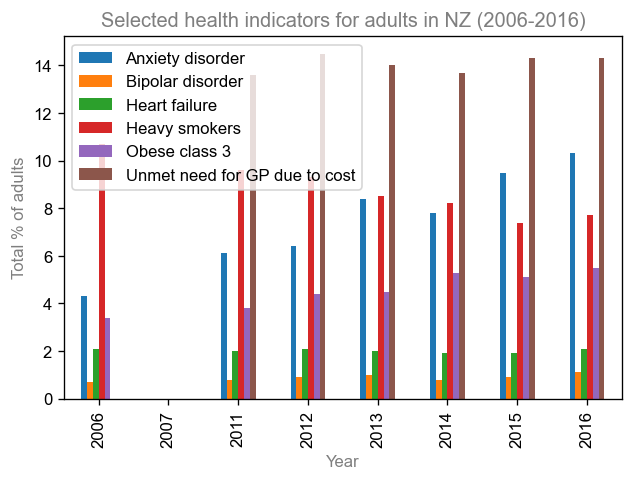

In [18]:
plot1 = hs_df_to_plot.T.plot(kind='bar')
plt.title("Selected health indicators for adults in NZ (2006-2016)", alpha=0.5)
plot1.set_xlabel("Year", alpha=0.5)
plot1.set_ylabel("Total % of adults", alpha=0.5)

#### Plot 2

Plot 2 displays a change in the number of adults suffering from an anxiety disorder in NZ between 2006 and 2016. The chart shows that the number of people is suffering from an anxiety disorder is slowly increasing each year, except for the year 2007 - no data recorded.

Text(0, 0.5, 'Total % of adults')

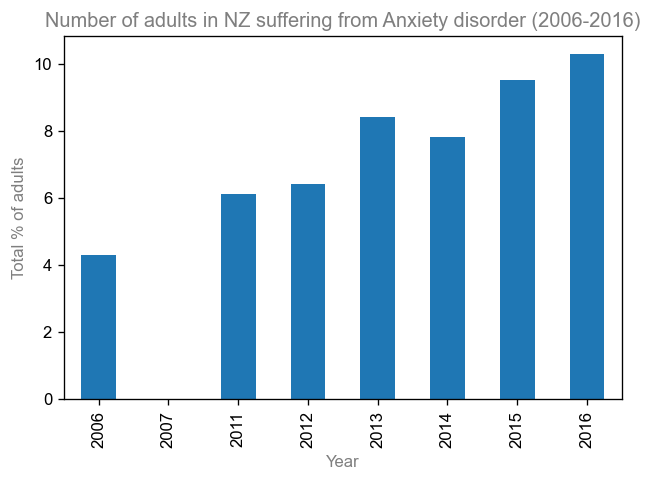

In [19]:
plot2 = hs_df_to_plot.iloc[0].plot(kind='bar')
plt.title("Number of adults in NZ suffering from Anxiety disorder (2006-2016)", alpha=0.5)
plot2.set_xlabel("Year", alpha=0.5)
plot2.set_ylabel("Total % of adults", alpha=0.5)

## Question 2: NZ Top 100 baby names

### Grouping and plotting

In [21]:
# Import data
bn_df = pd.read_csv("../datasets/baby_names.csv", encoding = "latin")
bn_df.head()

,Name,No.,year,sex
0,Christine,779,1954,Female
1,Susan,735,1954,Female
2,Margaret,562,1954,Female
3,Judith,531,1954,Female
4,Jennifer,460,1954,Female


#### Plot 1 - Children named top 100 in NZ from 1990 - 2018

The chart shows the total number of children with a popular name in NZ. According to the data, there is a noticeable decline during this period. However, it is unclear whether this decline was due to the decrease in the birth rate or an increase in the variety of names. 

Text(0, 0.5, 'Children')

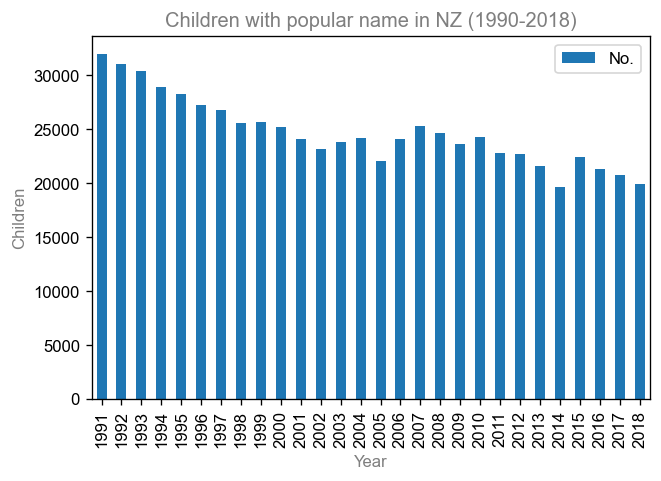

In [22]:
total_df = bn_df[(bn_df.year > 1990)].groupby(['year'], as_index=False)['No.'].sum()
total_df = total_df.set_index('year')
plot5 = total_df.plot.bar()
plt.title("Children with popular name in NZ (1990-2018)", alpha=0.5)
plot5.set_xlabel("Year", alpha=0.5)
plot5.set_ylabel("Children", alpha=0.5)

#### Plot 2 - Number of boys and girls named top 100 popular names for the peroid 1990-2018

The chart shows the number of boys and girls with a popular name from 1990. Assuming that the total number of boys and girls born each year is close, the data shows that diversity among girl names is higher. 

Text(0, 0.5, 'Children')

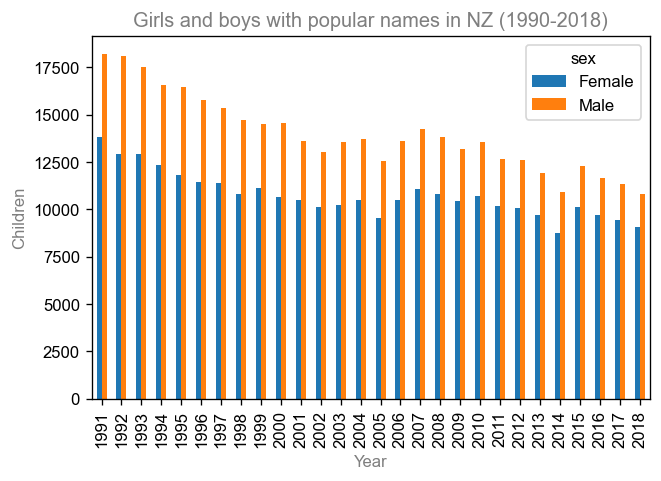

In [23]:
babies_df = bn_df[(bn_df.year > 1990)]
babies_df = babies_df.groupby(['year', 'sex'], as_index=False)['No.'].sum()
babies_df = babies_df.set_index('year').pivot_table(index=['year'], columns=['sex'], values='No.')
plot3 = babies_df.plot.bar()
plt.title("Girls and boys with popular names in NZ (1990-2018)", alpha=0.5)
plot3.set_xlabel("Year", alpha=0.5)
plot3.set_ylabel("Children", alpha=0.5)

#### Plot 3 - Trend of the most popular boy's and girl's name from 1990

The chart shows the trend for the most popular boy's and girl's name in NZ from 1990. The popularity of the most common name decreased dramatically for the period provided for both genders.

In [24]:
# Find the most popular girl's name amongst data
female_bn = bn_df[bn_df.sex == 'Female'].groupby('Name').sum().sort_values('No.', ascending=False)
female_bn.head(1)

,No.,year
Name,,
Sarah,19943,121268


In [25]:
# Find the most popular boy's name amongst data
male_bn = bn_df[bn_df.sex == 'Male'].groupby('Name').sum().sort_values('No.', ascending=False)
male_bn.head(1)

,No.,year
Name,,
Michael,40166,131078


Text(0, 0.5, 'Number of babies')

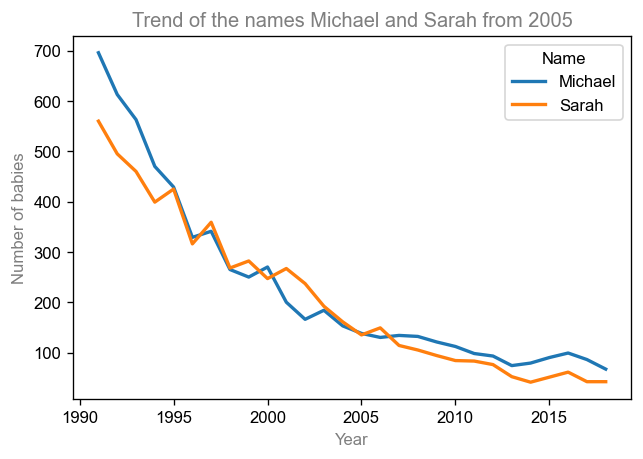

In [26]:
# Plot trend of the most popular girl's and boy's name from 2005
names_to_plot = bn_df[((bn_df.Name == 'Michael') & (bn_df.year > 1990)) | ((bn_df.Name == 'Sarah') & (bn_df.year > 1990))]
names_to_plot = names_to_plot.drop(['sex'], axis=1).set_index('year')
names_to_plot = names_to_plot.pivot_table(index=['year'], columns=['Name'], values='No.')
plot4 = names_to_plot.plot.line()
plt.title("Trend of the names Michael and Sarah from 2005", alpha=0.5)
plot4.set_xlabel("Year", alpha=0.5)
plot4.set_ylabel("Number of babies", alpha=0.5)

## Question 3: NZ Indicator data

# Poverty and Health in NZ

## Objective

Using "nz_indicators.csv" dataset find the relationship between poverty and health in NZ.

## Introduction

The "nz_indicators.csv" dataset covers socio-economic data on New Zealand, stretching back to the early 1980s. The data covers a range of topics: income and wealth distribution, poverty and deprivation levels, health measures, education outcomes, housing as well as employment. This dataset will be used to answer the following questions regarding poverty and health:

1. the trend in poverty levels in NZ 
2. the change in the number of people with a healthy weight and what factors may affect it
3. the correlation between poverty and suicides

### Importing data
Import appropriate data from dataset

In [27]:
# Import data
nz_df = pd.read_csv("../datasets/nz_indicators.csv", encoding = "latin")
ph_df = nz_df[['year', 'LIH_B60_contemp_median_AHC', 'LIH_B50_contemp_median_AHC', 'LIH_B50_CV_AHC', 'LIH_B60_CV_AHC',
               'LIH_B40_contemp_median_AHC', 'LIEH_B60_contemp_median_AHC', 'LIEH_B50_contemp_median_AHC', 
               'LIEH_B50_CV_median_AHC', 'LIEH_B60_CV_median_AHC', 'LIS65H_B60_CV_median_AHC', 'LISPH_B60_CV_median_AHC',
               'LIS65H_B50_CV_median_AHC', 'LISPH_B50_CV_median_AHC', 'child_poverty_ahc_perc_HH_B50_CV',
               'child_poverty_ahc_perc_HH_B60_CV', 'child_poverty_ahc_perc_HH_B40_contemp_median',
               'child_poverty_ahc_perc_HH_B50_contemp_median', 'child_poverty_ahc_perc_HH_B60_contemp_median',
               'child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents',
               'child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents', 
               'health_expenditure_as_percent_of_gdp', 'health_expenditure_per_capita_PPP', 'depression_adult',
               'excellent_very_good_or_good_self_rated_health', 'psychological_distress_adult', 'mood_anxiety_disorder_adult',
               'healthy_weight_adult', 'unmet_after_hours_care_due_to_cost_adult', 'unmet_GP_care_due_to_cost_adult',
               'veg_and_fruit_intake_adult', 'breakfast_eaten_at_home_less_5_days_a_week_child', 'adult_diabetes_rates',
               'emotional_behavioural_problems_child', 'depression_child', 'excellent_very_good_or_good_parent_rated_health_child',
               'unfilled_prescription_due_to_cost_child', 'unmet_need_for_after_hours_due_to_cost_child', 'healthy_weight_child',
               'unmet_need_for_GP_due_to_cost_child', 'vegetable_and_fruit_intake_child', 'suicides_per_100000',
               'problem_gambling_intervention_prevelance_percent'
               ]]
ph_df.head()

,year,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,LIEH_B50_CV_median_AHC,LIEH_B60_CV_median_AHC,...,emotional_behavioural_problems_child,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,healthy_weight_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent
0,31/12/2014 0:00,19,14,12,16,-,12,6,4,8,...,4,0.7,Q98.4,3.9,3.9,E62.6,J5.3,53.4U,11.730000,0.002798
1,31/12/2000 0:00,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.928744,NaN
2,31/12/1987 0:00,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.571673,NaN
3,31/12/2003 0:00,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.359663,NaN
4,31/12/2006 0:00,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.248800,0.000885


In [28]:
# Function that removes day, month and time (i.e. first 5 and last 6 characters) from year column
def remove_chars(x):
    x = x.replace(x[-5:], '')
    return x.replace(x[:6], '')
# Function that removes last 2 character
def remove_last(x):
    return x.replace(x[-2:], '')
pd.options.mode.chained_assignment = None
ph_df['year'] = ph_df['year'].apply(remove_chars)
ph_df = ph_df.set_index('year')
ph_df = ph_df.rename(columns={'LIH_B60_contemp_median_AHC': 'poverty_60ML', 'LIH_B50_contemp_median_AHC': 'poverty_50ML',
                              'LIH_B50_CV_AHC': 'poverty_50AL', 'LIH_B60_CV_AHC': 'poverty_60AL',
                              'LIH_B40_contemp_median_AHC': 'poverty_40AL', 'LIEH_B60_contemp_median_AHC': 'poverty_eld_60ML',
                              'LIEH_B50_contemp_median_AHC': 'poverty_eld_50ML', 'LIEH_B50_CV_median_AHC': 'poverty_eld_50AL',
                              'LIEH_B60_CV_median_AHC': 'poverty_eld_60AL', 'LIS65H_B60_CV_median_AHC': 'poverty_risk_s65_60AL', 
                              'LISPH_B60_CV_median_AHC': 'poverty_risk_sp_60AL', 'LIS65H_B50_CV_median_AHC': 'poverty_risk_s65_50AL',
                              'LISPH_B50_CV_median_AHC': 'poverty_risk_sp_50AL', 'child_poverty_ahc_perc_HH_B50_CV': 'poverty_child_50AL',
                              'child_poverty_ahc_perc_HH_B60_CV': 'poverty_child_60AL', 
                              'child_poverty_ahc_perc_HH_B40_contemp_median': 'poverty_child_40ML',
                              'child_poverty_ahc_perc_HH_B50_contemp_median': 'poverty_child_50ML', 
                              'child_poverty_ahc_perc_HH_B60_contemp_median': 'poverty_child_60ML',
                              'child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents': 'poverty_childPTP_60AL',
                              'child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents': 'poverty_childFTP_60AL'})
ph_df = ph_df.sort_index()

### Cleaning
To clean imported data I will follow the following steps:
1. Drop rows if all values in the row are missing
2. Replace all dashes, None, nan values with np.nan
3. When possible convert all values to float data type.
4. Interpolate data to fill gaps. The gaps make it difficult to connect data points from different metrics. Extrapolation may lead to incorrect data, so it's avoided.

In [29]:
# Delete rows if all values in a row are missing 
ph_df = ph_df.dropna(how='all')

# Funcion that replaces all dashes, Nona and nan with NaN
new_ph = ph_df.replace({"-": np.nan, 'None': np.nan, 'nan': np.nan})

# Function to clean values
def clean(val):
    if isinstance(val, str):
        new_val = ''
        for i in val:
            if i == ',':
                new_val += "."
            if i.isnumeric() or i == '.':
                new_val += i
        val = new_val              
    try:
        return float(val)
    except ValueError:
        return np.nan
cleaned_df = new_ph.applymap(clean)
ci_df = cleaned_df.interpolate(limit_area="inside")
ci_df.head()

,poverty_60ML,poverty_50ML,poverty_50AL,poverty_60AL,poverty_40AL,poverty_eld_60ML,poverty_eld_50ML,poverty_eld_50AL,poverty_eld_60AL,poverty_risk_s65_60AL,...,emotional_behavioural_problems_child,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,healthy_weight_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent
year,,,,,,,,,,,,,,,,,,,,,
1982,9.0,6.0,8.0,NaN,4.0,3.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,9.0,6.0,8.5,NaN,4.0,2.5,1.0,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,9.0,6.0,9.0,NaN,4.0,2.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,8.0,5.5,8.0,NaN,3.5,3.0,1.5,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.995119,NaN
1986,7.0,5.0,7.0,NaN,3.0,4.0,2.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.297609,NaN


### Plotting

##### Proportion of population in low-income households
New Zealand does not have an official poverty measure. However, low-income thresholds or poverty lines can be used. The ‘fixed line’ measure anchors the poverty line in a reference year, then adjusts it each survey with the Consumer Price Index. The ‘moving line’ or ‘relative’ measure sets the poverty line as a proportion of the median income.<br />
The graph below shows the percentage of the population with household income (after housing costs) below 60 % of the median income in NZ for the period from 1982 to 2017. According to the graph for adults, there was a slight decline in poverty levels between 1983 and 1985. Followed by a dramatic increase over the next decade (1985 - 1994) and, after 1994, the poverty level is stable and fluctuates around 19%. The poverty line for children living in families with low-income follows the same pattern as for adults showing approximately 5% higher values throughout the whole period. At the same time, the percentage of elderly earning below 60% of contemporary median (moving line) income after housing costs is significantly lower. It also has a different pattern with a trend for a constant increase from 1982 to 2017.

Text(0, 0.5, 'Poverty, %')

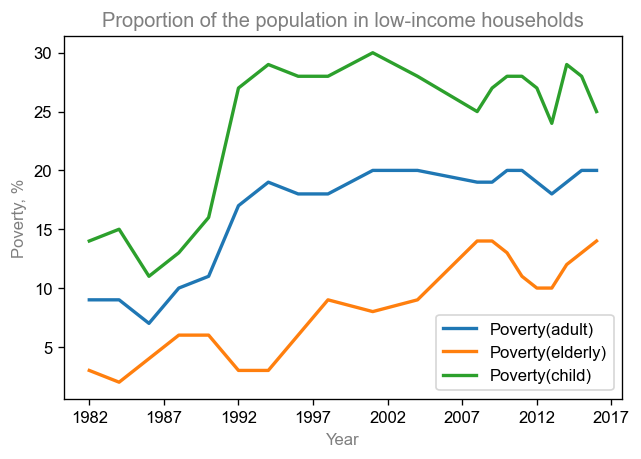

In [27]:
p60ml_df = ci_df[['poverty_60ML', 'poverty_eld_60ML', 'poverty_child_60ML']]
p60ml_df = p60ml_df.rename(columns={'poverty_60ML': 'Poverty(adult)', 'poverty_eld_60ML': 'Poverty(elderly)', 'poverty_child_60ML': 'Poverty(child)'})
plot5 = p60ml_df.plot()
plt.title("Proportion of the population in low-income households", alpha=0.5)
plot5.set_xlabel("Year", alpha=0.5)
plot5.set_ylabel("Poverty, %", alpha=0.5)

##### Changes in number of people with a healthy weight

Based an available data it is clear that there is a constant decline in the number of people with healthy weight defined as a BMI of 18.5-24.9. 

Text(0, 0.5, 'Adults with a healthy weight, %')

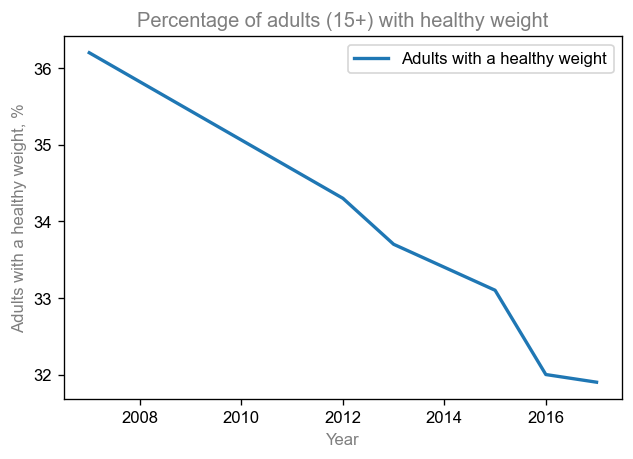

In [34]:
hw_df = ci_df[['healthy_weight_adult']]
hw_df = hw_df.rename(columns={'healthy_weight_adult': 'Adults with a healthy weight'})
plot6 = hw_df.plot()
plt.title("Percentage of adults (15+) with healthy weight", alpha=0.5)
plot6.set_xlabel("Year", alpha=0.5)
plot6.set_ylabel("Adults with a healthy weight, %", alpha=0.5)

To find if poverty factors affect number of people with a healthy weight, find all correlations betweeen healthy weight and other indicators, print the strongest.


In [29]:
corr_list = []
for col1 in ci_df:
    for col2 in ci_df:
        if col1 == col2:
            continue
        corr_list.append([ci_df[col1].corr(ci_df[col2]), col1, col2])
sorted_list = sorted(corr_list, key=lambda x: x[0])
hw_list = []
ps_list = []
pov_list = []
for i in sorted_list:
    if "healthy_weight_adult" in i:
        hw_list.append(i)
    if "poverty" in i[1] and "suicides" in i[2]:
        ps_list.append(i)
    if "poverty" in i[1]:
        pov_list.append(i)
print(sorted(hw_list, key=lambda x: x[0])[:10])

[[-0.9760907862174565, 'health_expenditure_per_capita_PPP', 'healthy_weight_adult'], [-0.9760907862174565, 'healthy_weight_adult', 'health_expenditure_per_capita_PPP'], [-0.9733896888775833, 'mood_anxiety_disorder_adult', 'healthy_weight_adult'], [-0.9733896888775833, 'healthy_weight_adult', 'mood_anxiety_disorder_adult'], [-0.9575674278089387, 'emotional_behavioural_problems_child', 'healthy_weight_adult'], [-0.9575674278089386, 'healthy_weight_adult', 'emotional_behavioural_problems_child'], [-0.9516435873938309, 'depression_adult', 'healthy_weight_adult'], [-0.9516435873938309, 'healthy_weight_adult', 'depression_adult'], [-0.9019459005650712, 'healthy_weight_adult', 'breakfast_eaten_at_home_less_5_days_a_week_child'], [-0.9019459005650712, 'breakfast_eaten_at_home_less_5_days_a_week_child', 'healthy_weight_adult']]


**Based on the data, there is strong negative correcation between number of people with a healthy weight, mood anxiety disorder and depression.**

Text(0.5, 1.0, 'Correlation between healthy weight and mood anxiety')

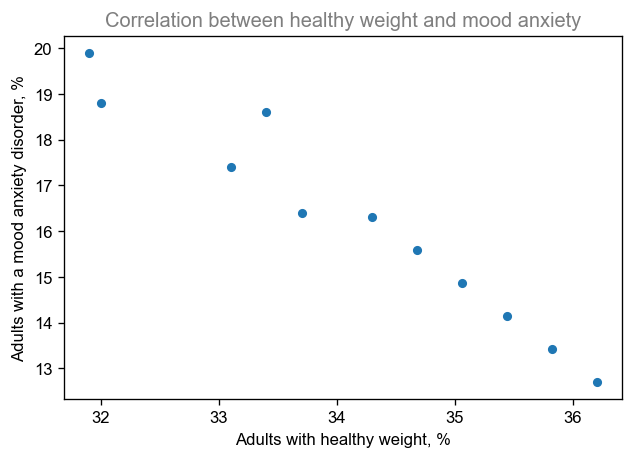

In [30]:
wa_df = ci_df[['healthy_weight_adult', 'mood_anxiety_disorder_adult']].dropna()
wa_df = wa_df.rename(columns={'healthy_weight_adult': 'Adults with healthy weight, %', 
                              'mood_anxiety_disorder_adult': 'Adults with a mood anxiety disorder, %'})
plot7 = wa_df.plot.scatter(x='Adults with healthy weight, %', y='Adults with a mood anxiety disorder, %')
plt.title("Correlation between healthy weight and mood anxiety", alpha=0.5)

##### Correlation between poverty and suicides
The nature of the relationship between poverty levels and suicide could be the subject of debate. Based on available data, there is a weak relationship between suicide numbers and poverty levels in NZ. 

In [31]:
print(sorted(ps_list, key=lambda x: x[0])[:5])

[[-0.5150515916722688, 'poverty_risk_s65_50AL', 'suicides_per_100000'], [-0.4833570974055502, 'poverty_eld_50ML', 'suicides_per_100000'], [-0.4627284158580343, 'poverty_eld_60ML', 'suicides_per_100000'], [-0.29546232330044014, 'poverty_childFTP_60AL', 'suicides_per_100000'], [-0.2572751012851738, 'poverty_risk_sp_50AL', 'suicides_per_100000']]


Text(0.5, 1.0, 'Correlation between poverty and number of suicides')

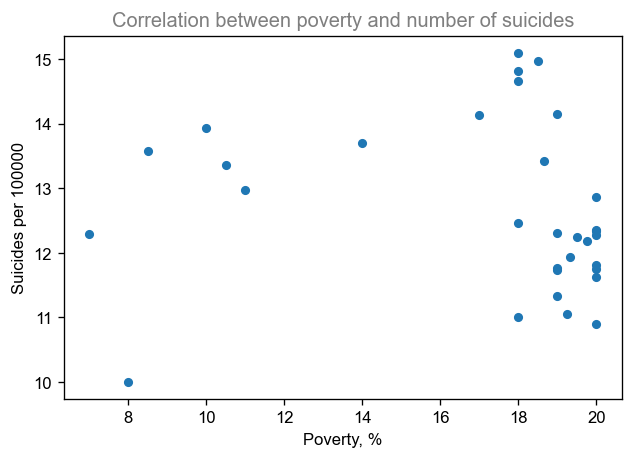

In [32]:
ps_df = ci_df[['poverty_60ML', 'suicides_per_100000']].dropna()
ps_df = ps_df.rename(columns={'poverty_60ML': 'Poverty, %', 'suicides_per_100000': 'Suicides per 100000'})
ps_corr = ps_df['Poverty, %'].corr(ps_df['Suicides per 100000'])
plot7 = ps_df.plot.scatter(x='Poverty, %', y='Suicides per 100000')
plt.title("Correlation between poverty and number of suicides", alpha=0.5)

#### Correlation between poverty and health

Iterate through the data and find the factors that affect each other the most. 

In [33]:
# Function that iterates through df and calculates all possible correlations
print(sorted(pov_list, key=lambda x: x[0])[:5])

[[-0.9690889908638127, 'poverty_50AL', 'health_expenditure_per_capita_PPP'], [-0.9599303293202955, 'poverty_60AL', 'health_expenditure_per_capita_PPP'], [-0.9437119782296973, 'poverty_50AL', 'health_expenditure_as_percent_of_gdp'], [-0.9437014308415508, 'poverty_50ML', 'unmet_after_hours_care_due_to_cost_adult'], [-0.9030568587053496, 'poverty_60AL', 'health_expenditure_as_percent_of_gdp']]


### Conclusion

There were no dramatic changes in the poverty numbers in the last 20 years. However, there is a significant gap between the numbers of children and elderly living in low-income households. 
The data showed that the percentage of adults with a healthy weight decline each year. And it has a strong connection with certain mental disorders, including depression and mood anxiety disorder. At the same time, a weak or no correlation was found between poverty levels and suicide numbers. 